In [1]:
import torch
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

from PIL import Image

import numpy as np

import copy
import pickle
import os

import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
with open('./pretrained/ffhq.pkl', 'rb') as f:
    G = pickle.load(f)['G_ema'].cuda()

In [3]:
device = torch.device('cuda')
G_eval = copy.deepcopy(G).eval().requires_grad_(False).to(device) # use g as the evaluation mode (do not track gradients)

# aesthetic weight

In [4]:
aesthetic_w1 = np.load('./output/aesthetic_vec/before_after1/aesthetic_w1.npy')
aesthetic_w2 = np.load('./output/aesthetic_vec/before_after2/aesthetic_w2.npy')
aesthetic_w3 = np.load('./output/aesthetic_vec/before_after3/aesthetic_w3.npy')
#aesthetic_w4 = np.load('./output/aesthetic_vec/before_after4/aesthetic_w4.npy')
aesthetic_w5 = np.load('./output/aesthetic_vec/before_after5/aesthetic_w5.npy')
aesthetic_w6 = np.load('./output/aesthetic_vec/before_after6/aesthetic_w6.npy')

In [5]:
aesthetic_w_avg = (aesthetic_w1 + aesthetic_w2 + aesthetic_w3 + aesthetic_w5 + aesthetic_w6)/5

In [6]:
np_w = aesthetic_w_avg
np.save('./output/aesthetic_vec/aesthetic_w_avg', np_w)

In [7]:
aesthetic_w_avg.shape

(18, 512)

In [8]:
aesthetic_w_avg = torch.from_numpy(aesthetic_w_avg).to(device)

In [9]:
aesthetic_w_avg.shape

torch.Size([18, 512])

In [10]:
aesthetic_w_avg.unsqueeze(0).shape

torch.Size([1, 18, 512])

In [11]:
aesthetic_vec = G.synthesis(aesthetic_w_avg.unsqueeze(0).to(device), noise_mode='const')
aesthetic_vec = (aesthetic_vec + 1) * (255/2)
aesthetic_vec = aesthetic_vec.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8)[0].cpu().numpy()

Setting up PyTorch plugin "bias_act_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!


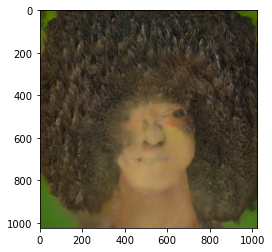

In [12]:
plt.imshow(aesthetic_vec)

In [13]:
before_to_after_avg_img = Image.fromarray(aesthetic_vec)
before_to_after_avg_img.save('./output/aesthetic_vec/aesthetic_w_avg.png', format='PNG')

# test

In [14]:
before = np.load('./output/video/before4/before4.npz')
before = torch.from_numpy(before['w']).to(device)
before.size()

torch.Size([1, 18, 512])

In [15]:
before = before.resize(18, 512)
before.size()

torch.Size([18, 512])

In [16]:
synth = G.synthesis(before.unsqueeze(0), noise_mode='const')
synth = (synth + 1) * (255/2)
synth = synth.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8)[0].cpu().numpy()

Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!


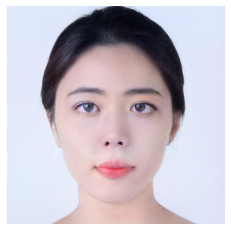

In [17]:
plt.imshow(synth)
plt.axis('off')
plt.show()

### before to after

Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!


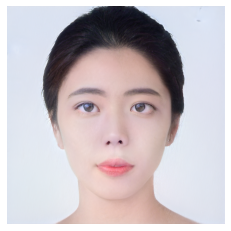

In [18]:
before_to_after = G.synthesis((before + aesthetic_w_avg*0.67).unsqueeze(0), noise_mode='const')
before_to_after = (before_to_after + 1) * (255/2)
before_to_after = before_to_after.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8)[0].cpu().numpy()

plt.imshow(before_to_after)
plt.axis('off')
plt.show()

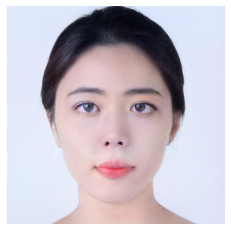

In [19]:
# generated before image
plt.imshow(synth)
plt.axis('off')
plt.show()

In [20]:
before_to_after_img = Image.fromarray(before_to_after)
before_to_after_img.save('./output/aesthetic_vec/before_to_after_test.png', format='PNG')